# IBM Statistics for Data Science with Python
# Project
# Data Exploration

In [56]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [24]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [25]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


Text(0.5, 1.0, 'Owner-occupied homes')

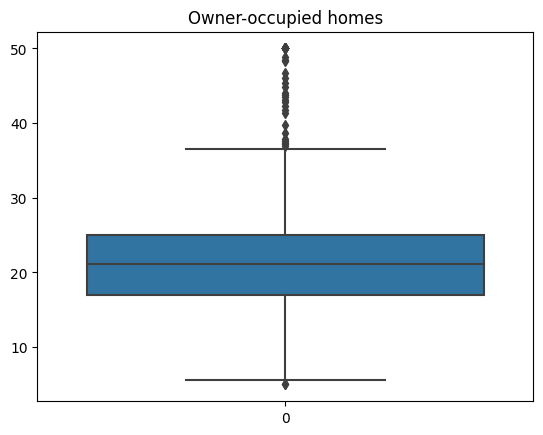

In [5]:
# boxplot for median value of owner-occupied homes
ax = sns.boxplot(boston_df['MEDV'])
ax.set_title("Owner-occupied homes")

Text(0.5, 1.0, 'Homes near the Charles River')

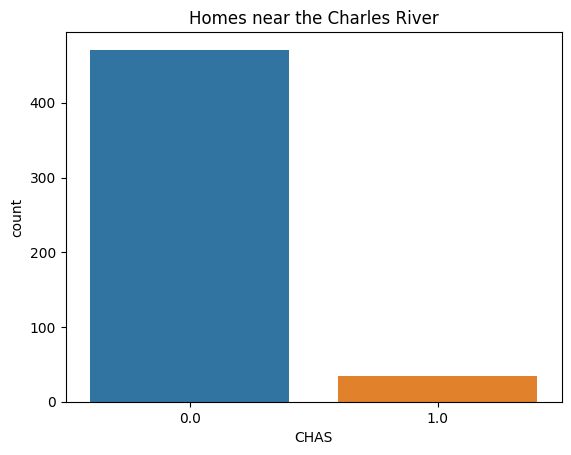

In [26]:
# bar plot for Charles River variable
ax1 = sns.countplot(x = boston_df.CHAS)
ax1.set_title("Homes near the Charles River")

[Text(0.5, 1.0, 'Median Value of owner-occupied homes vs Proportion Built before 1940'),
 Text(0.5, 0, 'Proportion of owner-occupied units built before 1940'),
 Text(0, 0.5, "Median valye of owner-occupied homes in $1000's")]

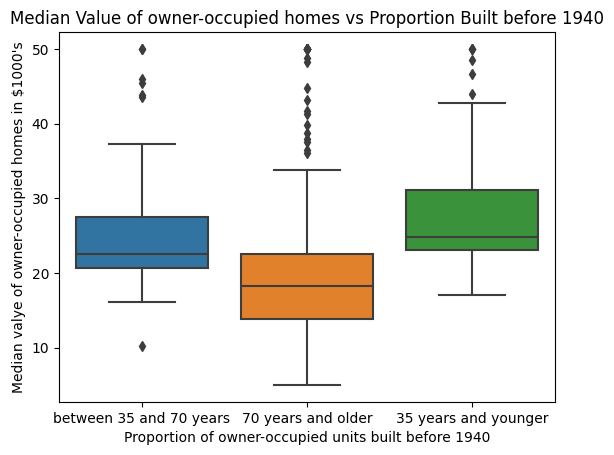

In [27]:
# boxplot for MEDV variable vs the AGE variable
# discretize the age variable into three groups
    # 35 years and younger
    # between 35 years and 70 years
    # 70 years anf older
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)
ax.set(title = "Median Value of owner-occupied homes vs Proportion Built before 1940",
      xlabel = "Proportion of owner-occupied units built before 1940",
      ylabel = "Median valye of owner-occupied homes in $1000's")

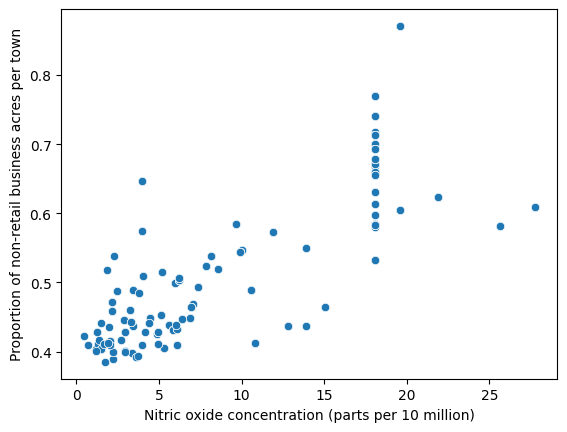

In [28]:
# scatter plot to show relationship between nitric oxide concentration 
# and proportion of non-retail business acres per town
y = boston_df['NOX']
x = boston_df['INDUS']
g = sns.scatterplot(x = x, y = y)
g.set(ylabel='Proportion of non-retail business acres per town',
     xlabel='Nitric oxide concentration (parts per 10 million)')

plt.show()

The scatterplot above shows a positive correlation between the nitric oxide concentration and the propportion of non-retail bisiness acres per town. This means as one variable increases, the other does, too.

[Text(0.5, 1.0, 'Pupil-Teacher Ratio by Town')]

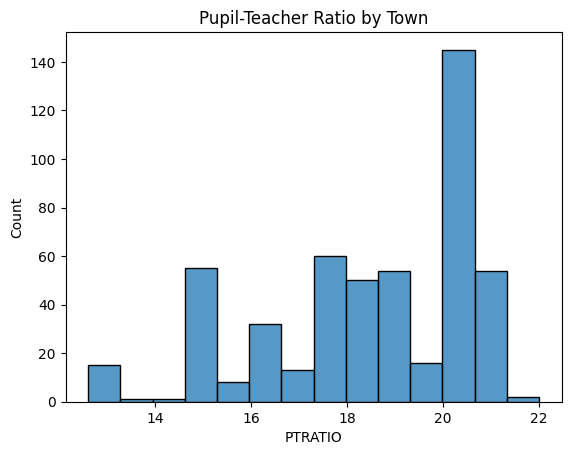

In [29]:
# histogram for pupil to teacher ratio variable
g = sns.histplot(boston_df['PTRATIO'])
g.set(title='Pupil-Teacher Ratio by Town')

# Hypothesis Testing
### Hypothesis 1
Is there a significant difference in median value of houses bounded by the Charles river or not?

H<sub>0</sub>: There is no difference in median value of houses bounded by the Charles river

H<sub>A</sub>: There is a significant difference in median value of houses bounded by the Charles river

Alpha value: 0.05

In [33]:
# levene's test to check equality of variance
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center='median')

LeveneResult(statistic=483.51250993800966, pvalue=7.087575216458403e-88)

The small p value supports that the varainces are not equal.

In [34]:
# t-test for independent samples
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'], equal_var=False)

Ttest_indResult(statistic=54.9210289745203, pvalue=2.752650575837329e-215)

Results: 

The p-value being below the alpha value of 0.05 supports rejecting the null hypothesis. This indicates a difference in median value of houses bounded by the Charles river.

### Hypothesis 2
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

H<sub>0</sub>: There is no difference in median values of houses for each propotion of owner occupied units built prior to 1940

H<sub>A</sub>: There is a significant difference in median values of houses for each proportion of owner occupied units built prior to 1940

Alpha value: 0.05

Data has already been made into groups for ANOVA in the age_group category

In [35]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


In [44]:
# Levene's test for variance equality
scipy.stats.levene(boston_df[boston_df['age_group'] == "35 years and younger"]['MEDV'],
                   boston_df[boston_df['age_group'] == "between 35 and 70 years"]['MEDV'], 
                   boston_df[boston_df['age_group'] == "70 years and older"]['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

The large p value supports that the varainces are equal.

In [51]:
# split each into a varaible
young = boston_df[boston_df['age_group'] == "35 years and younger"]['MEDV']
bet = boston_df[boston_df['age_group'] == "between 35 and 70 years"]['MEDV']
old = boston_df[boston_df['age_group'] == "70 years and older"]['MEDV']

In [52]:
# ANOVA
scipy.stats.f_oneway(young, bet, old)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Results:

The small p-value being below indicates a significance in the relationship and allows for rejecting the null hypothesis in support of there being a significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.

### Hypothesis 3
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

H<sub>0</sub>: There is no relationship between nitric oxide concentrations and the proportion of non-retail business acres per town

H<sub>A</sub>: There is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town

Alpha value: 0.05

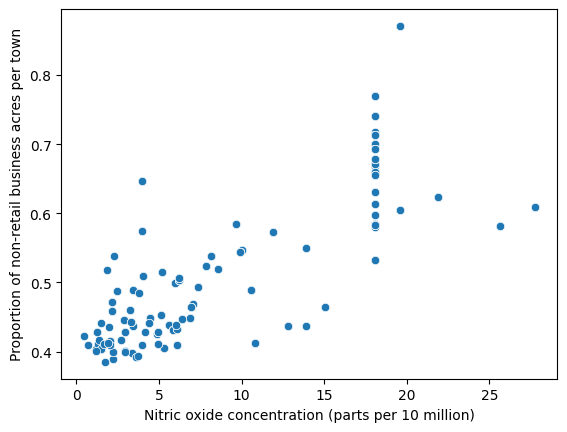

In [53]:
# scatter plot to show relationship between nitric oxide concentration 
# and proportion of non-retail business acres per town
y = boston_df['NOX']
x = boston_df['INDUS']
g = sns.scatterplot(x = x, y = y)
g.set(ylabel='Proportion of non-retail business acres per town',
     xlabel='Nitric oxide concentration (parts per 10 million)')

plt.show()

In [54]:
# pearson correlation
scipy.stats.pearsonr(x, y)

PearsonRResult(statistic=0.7636514469209158, pvalue=7.913361061232845e-98)

Results:

With the small p-value below the alpha level of 0.05, we can reject the null hypothesis, meaning there is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.

### Hypothesis 4
What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes?

H<sub>0</sub>: There is no impact of additional weighted distance to the five Boston emplyment centers on the median value of owner occupied homes

H<sub>A</sub>: There is a significant impact of additional weighted distance to the five Boston employment centers on the median value of owner occupied homes

Alpha value: 0.05

In [58]:
# regression analysis
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

predict = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           1.21e-08
Time:                        14:58:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Results:

With the p-value being below the alpha level of 0.05 we can reject the null hypothesis. This means there is a significant impact of additional weighted distance to the five Boston employment centers on the median value of owner occupied homes.